In [15]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

# Set a seed for reproducibility
np.random.seed(42)



def generate_diamond_border(n, dtype = 'int'):
    # Create an n x n matrix filled with zeros
    diamond_border = np.zeros((n, n))

    # Determine the size of the diamond
    diamond_size = n // 2

    for i in range(diamond_size):
        # Top part of the diamond
        diamond_border[i, diamond_size - i] = 1
        diamond_border[i, diamond_size + i] = 1

        # Bottom part of the diamond
        diamond_border[n - i - 1, diamond_size - i] = 1
        diamond_border[n - i - 1, diamond_size + i] = 1
    if n % 2 == 1:
        diamond_border[diamond_size, 0] = 1
        diamond_border[diamond_size, -1] = 1
    if dtype == 'bool':
        return diamond_border.astype(bool)
    return diamond_border

# Generate the diamond border and noise
n = 9
diamond_border = generate_diamond_border(n)

def generate_diamond_sequence(n):
    # Create the diamond grid using the generate_diamond_border function
    diamond_grid = generate_diamond_border(n)

    # Flatten the grid into a vector
    diamond_vector = diamond_grid.flatten()

    # Convert the vector into a binary sequence string
    diamond_sequence = ''.join(map(str, diamond_vector.astype(int)))

    return diamond_sequence

def plot_sequence(sequence):
    # Convert sequence from string to list of integers
    vector = np.array(list(map(int, sequence)))

    # Reshape vector into n x n grid
    grid = np.reshape(vector, (n, n))

    # Create a figure and a set of subplots
    fig, ax = plt.subplots()

    # Display data as an image
    ax.imshow(grid, cmap='gray_r')

    # Draw gridlines
    ax.grid(True, which='both', color='black', linewidth=1)

    # Configure gridlines
    ax.set_xticks(np.arange(-0.5, n, 1), minor=False)
    ax.set_yticks(np.arange(-0.5, n, 1), minor=False)
    
    # Remove labels from gridlines
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Display the plot
    plt.show()

import random

# Initialize a dictionary with random values between 0 and 0.5 for each position
random_values = {i: random.uniform(0, 1) for i in range(n*n)}

def fitness(vector):
    if isinstance(vector, str):
        vector = np.array(list(map(int, vector)))

    # Reshape vector into n x n grid
    grid = np.reshape(vector, (n, n))

    # Compute fitness by summing pixel values
    fitness_values = np.zeros_like(grid, dtype=float)
    for i in range(n):
        for j in range(n):
            if grid[i, j] == 1:
                fitness_values[i, j] = diamond_border[i, j]
            else:
                fitness_values[i, j] = random_values[i*n + j]

    fitness_base = np.sum(fitness_values)

    return fitness_base


In [20]:
# Initialize list to hold sequences and their targets
data = []
seen_set = set()
# Sample 100k binary vectors and compute their fitnesses
while len(data) < 1e5:
    # Generate random binary vector
    vector = np.random.randint(2, size=n*n)
    seq = ''.join(map(str, vector.astype(int)))
    if seq in seen_set:
        continue
    seen_set.add(seq)
    # Compute fitness
    fitness_value = fitness(vector)
    
    # Convert vector to string for easier storage and retrieval
    sequence = ''.join(map(str, vector))
    
    # Append sequence and fitness to data
    data.append([sequence, fitness_value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['sequence', 'target'])

In [21]:
df['augmented'] = [0]*df.shape[0]

In [22]:
df.to_csv('../data/Diamond/ground_truth.csv', index = False)

In [18]:
from polyleven import levenshtein
best_seq = generate_diamond_sequence(9)
df['hamming_dist'] = df['sequence'].apply(lambda seq: levenshtein(seq, best_seq))

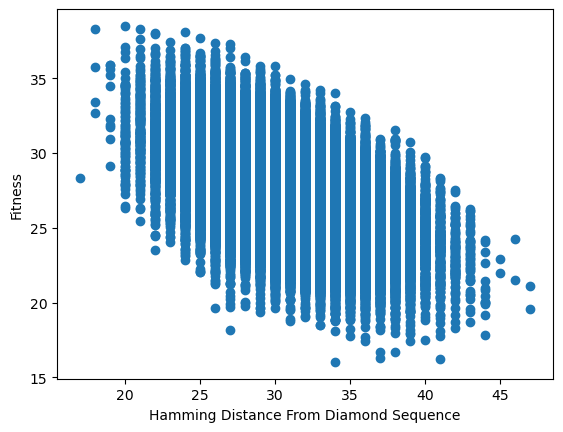

In [19]:
plt.scatter(df.hamming_dist, df.target)
plt.xlabel("Hamming Distance From Diamond Sequence")
plt.ylabel("Fitness")
plt.show()

In [192]:
gfp_wt = 'SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK'
gt_gfp = pd.read_csv('/home/gridsan/akirjner/protein_design/GGS/data/GFP/ground_truth.csv')
gt_gfp['hamming_dist'] = gt_gfp['sequence'].apply(lambda seq: levenshtein(seq, gfp_wt))

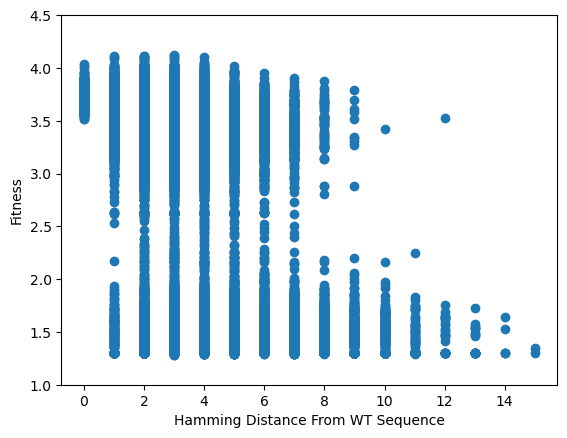

In [195]:
plt.scatter(gt_gfp.hamming_dist, gt_gfp.target)
plt.xlabel("Hamming Distance From WT Sequence")
plt.ylabel("Fitness")
plt.ylim(1, 4.5)
plt.show()

In [176]:
max_seq = df[df.target == df.target.max()].sequence.values[0]

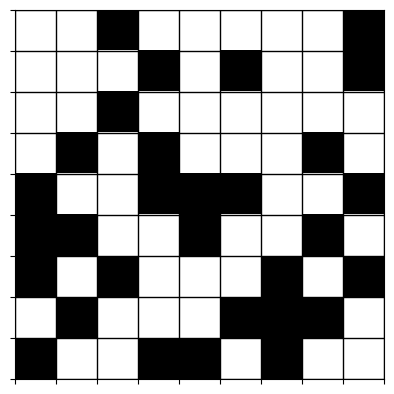

In [177]:
plot_sequence(max_seq)

In [9]:
best_seq = generate_diamond_sequence(9)
fitness(best_seq)

52.47795328975599

In [10]:
df.target.max()

41.003732722281995